In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.graph_objects as go
import random

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import wrangle
import wrangle2
import seaborn as sns
import exploration

In [2]:
small_home, medium_home, large_home = wrangle2.wrangle_zillow()

/Users/jarad/codeup_data_science/zillow_home_prediction_project/wrangle2.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fed_code"] = df["fips"].astype(int)
/Users/jarad/codeup_data_science/zillow_home_prediction_project/wrangle2.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_built"] = df["yearbuilt"].astype(int)
/Users/jarad/codeup_data_science/zillow_home_prediction_project/wrangle2.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [3]:
small_home.shape, medium_home.shape, large_home.shape

((14821, 13), (22234, 13), (9574, 13))

In [4]:
small_train, small_valid, small_test = wrangle2.split_zillow(small_home)

In [5]:
med_train, med_valid, med_test = wrangle2.split_zillow(medium_home)

In [6]:
large_train, large_valid, large_test = wrangle2.split_zillow(large_home)

<AxesSubplot:>

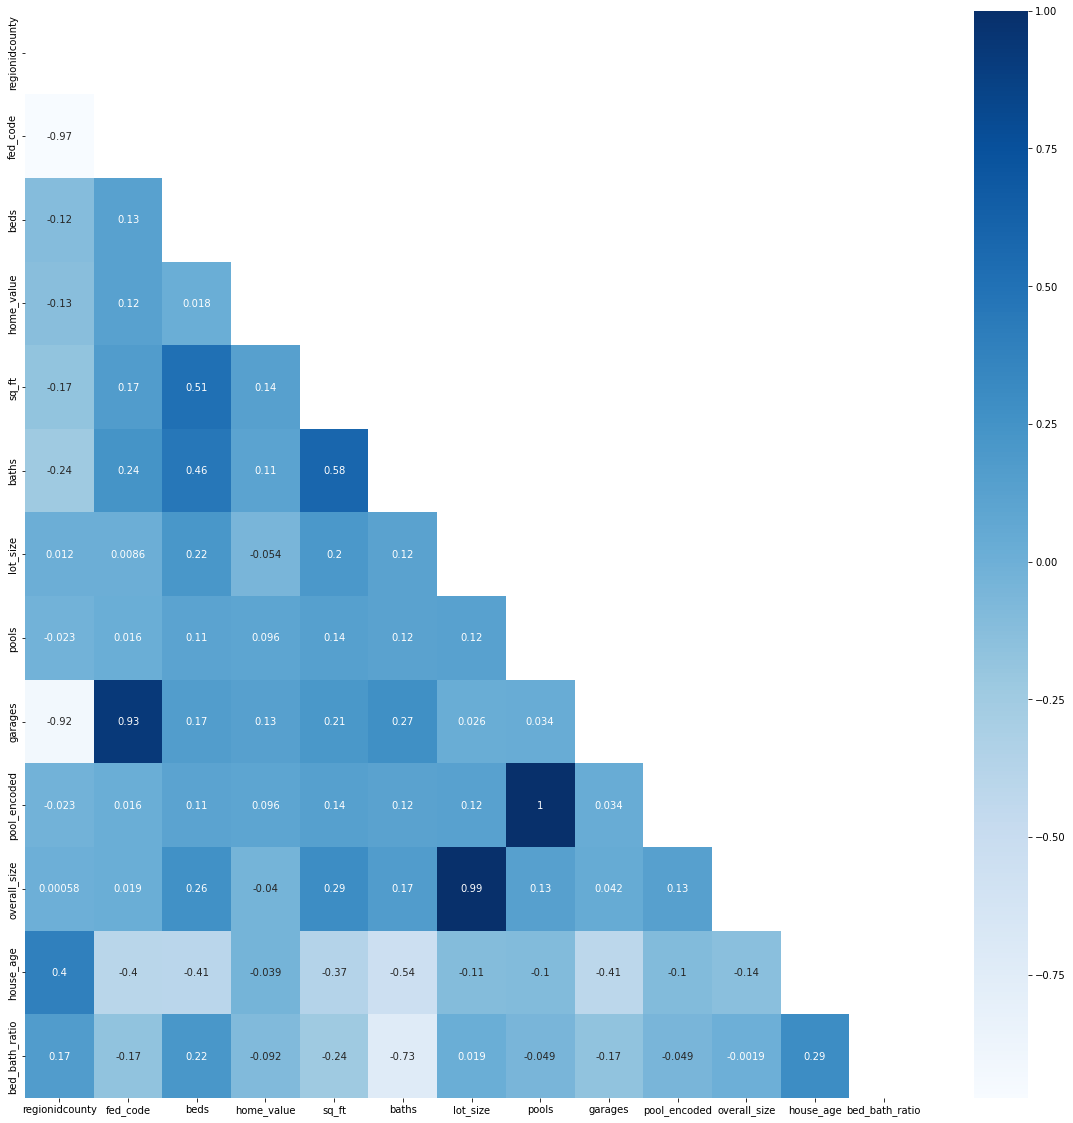

In [12]:
# making a correlation table using spearman becuase data is not normally distributed
correlation_table_small = small_train.corr(method='spearman')

# Declaring a size for the heatmap and making heatmap to see the correlations between all variables in the dataset
plt.figure(figsize= (20,20))
sns.heatmap(correlation_table_small, cmap='Blues', annot = True, mask = np.triu(correlation_table_small))

<AxesSubplot:>

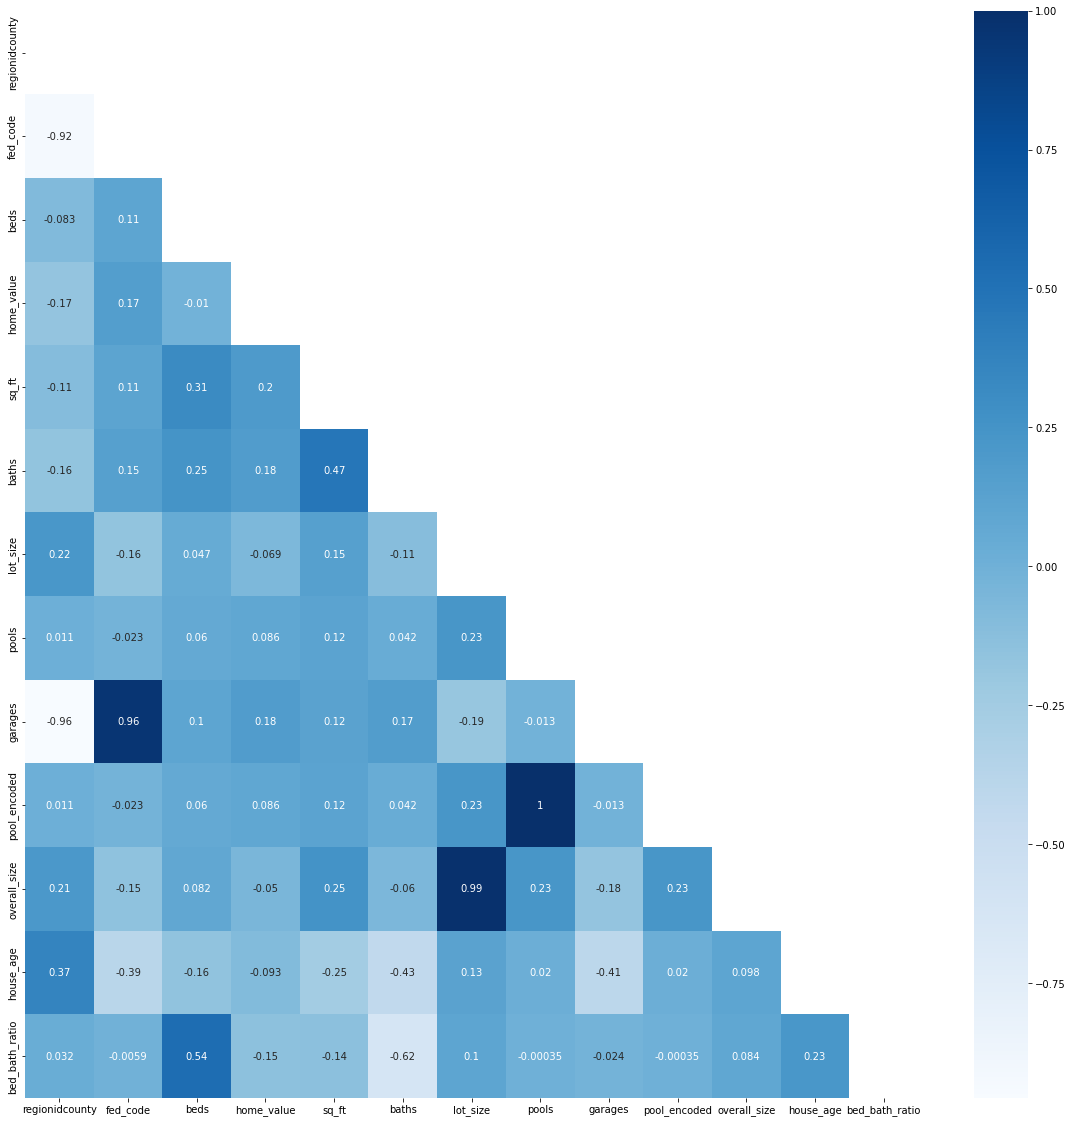

In [13]:
# making a correlation table using spearman becuase data is not normally distributed
correlation_table_medium = med_train.corr(method='spearman')

# Declaring a size for the heatmap and making heatmap to see the correlations between all variables in the dataset
plt.figure(figsize= (20,20))
sns.heatmap(correlation_table_medium, cmap='Blues', annot = True, mask = np.triu(correlation_table_medium))

In [14]:
# Stat testing the Correlations between square footage and home value across all three data sets

s_corr, s_p = stats.spearmanr(small_train.sq_ft, small_train.home_value)

m_corr, m_p = stats.spearmanr(med_train.sq_ft, med_train.home_value)

l_corr, l_p = stats.spearmanr(large_train.sq_ft, large_train.home_value)

s_corr, s_p, m_corr, m_p, l_corr, l_p

(0.13544476963859,
 4.52652369592028e-40,
 0.19686303495111468,
 2.6339575839712934e-124,
 0.2850330424639099,
 7.136598109982295e-115)

In [15]:
# Stat testing the Correlations between square footage and home value across all three data sets

s_corr, s_p = stats.spearmanr(small_train.bed_bath_ratio, small_train.home_value)

m_corr, m_p = stats.spearmanr(med_train.bed_bath_ratio, med_train.home_value)

l_corr, l_p = stats.spearmanr(large_train.bed_bath_ratio, large_train.home_value)

s_corr, s_p, m_corr, m_p, l_corr, l_p

(-0.09161895451013749,
 3.891036770204494e-19,
 -0.14585622554643307,
 1.689868465861865e-68,
 -0.19865436302985282,
 1.4362163395552136e-55)

In [16]:
# Stat testing the Correlations between square footage and home value across all three data sets

s_corr, s_p = stats.spearmanr(small_train.pool_encoded, small_train.home_value)

m_corr, m_p = stats.spearmanr(med_train.pool_encoded, med_train.home_value)

l_corr, l_p = stats.spearmanr(large_train.pool_encoded, large_train.home_value)

s_corr, s_p, m_corr, m_p, l_corr, l_p

(0.09562688468913887,
 1.0304258854834638e-20,
 0.08578579306648862,
 1.171353859681837e-24,
 0.09143451327733527,
 7.466189112213871e-13)

In [17]:
s_train = small_train.drop(columns = 'home_value')
s_validate =small_valid.drop(columns = 'home_value')
s_test = small_test.drop(columns = 'home_value')


y_s_train = small_train['home_value']
y_s_valid = small_valid['home_value']
y_s_test = small_test['home_value']





In [18]:
# Pulling in the min max function to scale the desired features and checks output below
s_train_scaled, s_validate_scaled, s_test_scaled = wrangle.MinMax_scaler(s_train, s_validate, s_test)

s_train_scaled.head()

,regionidcounty,fed_code,beds,sq_ft,baths,lot_size,pools,garages,pool_encoded,overall_size,house_age,bed_bath_ratio
10634,1.0,0.000000,0.50,0.823529,0.000000,0.000756,0.0,0.0,0.0,0.000784,0.561538,0.589041
26343,0.0,0.297297,0.50,0.895141,0.153846,0.000964,0.0,0.4,0.0,0.001004,0.415385,0.280822
37457,1.0,0.000000,0.00,0.465473,0.000000,0.000815,0.0,0.0,0.0,0.000783,0.484615,0.178082
46990,0.0,0.297297,0.50,0.808184,0.076923,0.000147,0.0,0.4,0.0,0.000173,0.330769,0.383562
26858,1.0,0.000000,0.25,0.852515,0.000000,0.000580,0.0,0.0,0.0,0.000613,0.592308,0.383562


In [19]:
# importing the select k best function to help determine best features
exploration.select_kbest(s_train_scaled, y_s_train,5)

Index(['regionidcounty', 'sq_ft', 'baths', 'garages', 'bed_bath_ratio'], dtype='object')

In [20]:
small_train['baseline'] = small_train.home_value.mean()
small_valid['baseline'] = small_valid.home_value.mean()

s_train_rmse = mean_squared_error(small_train.home_value, small_train.baseline, squared=False)
s_valid_rmse = mean_squared_error(small_valid.home_value, small_valid.baseline, squared=False)


print('Train baseline RMSE: {}.'.format(s_train_rmse))
print('Validation baseline RMSE: {}.'.format(s_valid_rmse))

Train baseline RMSE: 179587.22933568485.
Validation baseline RMSE: 177430.3131267191.


In [21]:
s_train = s_train_scaled[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages', 'regionidcounty']]
s_validate = s_validate_scaled[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages', 'regionidcounty']]

predictions = pd.DataFrame({
    'actual': small_valid.home_value
}) 

In [22]:
# Setting up and fitting the data for linear regression using my sqrt data for normalization
liner = LinearRegression()

liner.fit(s_train, y_s_train)

predictions['simple_lm'] = liner.predict(s_validate)

In [23]:
# Setting up and fitting the lars to my normalized data

lars = LassoLars(alpha=2.0)

lars.fit(s_train, y_s_train)


predictions['Lasso_Lars'] = lars.predict(s_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [24]:
# Setting up and fitting the TweedieRegressor to the non-normalized data
tweedie = TweedieRegressor(power=0, alpha=1)

tweedie.fit(s_train, y_s_train)


predictions['tweedie'] = tweedie.predict(s_validate)


In [25]:
predictions['baseline'] = small_train.home_value.mean()

In [26]:
def calculate_rmse(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted, squared=False)

predictions.apply(calculate_rmse).sort_values()

actual             0.000000
Lasso_Lars    174307.242734
simple_lm     174313.080705
tweedie       176928.145371
baseline      177451.934875
dtype: float64

#
---

In [27]:
m_train = med_train.drop(columns = 'home_value')
m_validate =med_valid.drop(columns = 'home_value')
m_test = med_test.drop(columns = 'home_value')

y_m_train = med_train['home_value']
y_m_valid = med_valid['home_value']
y_m_test = med_test['home_value']


In [28]:
# Pulling in the min max function to scale the desired features and checks output below
m_train_scaled, m_validate_scaled, m_test_scaled = wrangle.MinMax_scaler(m_train, m_validate, m_test)

m_train_scaled.head()

,regionidcounty,fed_code,beds,sq_ft,baths,lot_size,pools,garages,pool_encoded,overall_size,house_age,bed_bath_ratio
10804,0.0,0.297297,0.333333,0.019481,0.250,0.000942,0.0,0.285714,0.0,0.000933,0.434783,0.250000
14859,0.0,0.297297,0.500000,0.585498,0.250,0.000980,1.0,0.285714,1.0,0.001046,0.297101,0.357143
47761,0.0,0.297297,0.333333,0.392857,0.250,0.000906,0.0,0.285714,0.0,0.000946,0.434783,0.250000
26264,0.0,0.297297,0.333333,0.818182,0.375,0.003035,1.0,0.285714,1.0,0.003132,0.434783,0.185714
37850,1.0,0.000000,0.500000,0.889610,0.500,0.000696,1.0,0.000000,1.0,0.000802,0.246377,0.214286


In [29]:
# importing the select k best function to help determine best features
exploration.select_kbest(m_train_scaled, y_m_train,5)

Index(['regionidcounty', 'sq_ft', 'baths', 'garages', 'bed_bath_ratio'], dtype='object')

In [30]:
med_train['baseline'] = med_train.home_value.mean()
med_valid['baseline'] = med_valid.home_value.mean()

m_train_rmse = mean_squared_error(med_train.home_value, med_train.baseline, squared=False)
m_valid_rmse = mean_squared_error(med_valid.home_value, med_valid.baseline, squared=False)


print('Train baseline RMSE: {}.'.format(m_train_rmse))
print('Validation baseline RMSE: {}.'.format(m_valid_rmse))

Train baseline RMSE: 218718.45561930063.
Validation baseline RMSE: 212963.26979375014.


In [31]:
m_train = m_train_scaled[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages', 'regionidcounty']]
m_validate = m_validate_scaled[['house_age', 'bed_bath_ratio', 'sq_ft', 'pool_encoded', 'garages', 'regionidcounty']]

predictions = pd.DataFrame({
    'actual': med_valid.home_value
}) 

In [32]:
# Setting up and fitting the data for linear regression using my sqrt data for normalization
liner2 = LinearRegression()

liner2.fit(m_train, y_m_train)

predictions['simple_lm'] = liner.predict(m_validate)

In [33]:
# Setting up and fitting the lars to my normalized data

lars2 = LassoLars(alpha=2.0)

lars2.fit(m_train, y_m_train)


predictions['Lasso_Lars'] = lars.predict(m_validate)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [34]:
# Setting up and fitting the TweedieRegressor to the non-normalized data
tweedie2 = TweedieRegressor(power=0, alpha=1)

tweedie2.fit(m_train, y_m_train)


predictions['tweedie'] = tweedie.predict(m_validate)


In [39]:
predictions['baseline'] = med_train.home_value.mean()

In [40]:
def calculate_rmse2(y_predicted):
    return mean_squared_error(predictions.actual, y_predicted, squared=False)

predictions.apply(calculate_rmse2).sort_values()

actual             0.000000
baseline      213085.849782
tweedie       229826.091701
Lasso_Lars    247845.734383
simple_lm     248241.889810
dtype: float64

#
---

In [37]:

l_train = large_train.drop(columns = 'home_value')
l_validate =large_valid.drop(columns = 'home_value')
l_test = large_test.drop(columns = 'home_value')

y_l_train = large_train['home_value']
y_l_valid = large_valid['home_value']
y_l_test = large_test['home_value']

#
scaler = RobustScaler()
scaler.fit(l_train)

l_train_scaled = pd.DataFrame(scaler.transform(l_train), index=l_train.index, columns=l_train.columns)
l_validate_scaled = pd.DataFrame(scaler.transform(l_validate), index=l_validate.index, columns=l_validate.columns)
l_test_scaled = pd.DataFrame(scaler.transform(l_test), index=l_test.index, columns=l_test.columns)


In [38]:
# importing the select k best function to help determine best features
exploration.select_kbest(l_train_scaled, y_l_train,5)

Index(['regionidcounty', 'sq_ft', 'baths', 'garages', 'house_age'], dtype='object')